<a href="https://colab.research.google.com/github/lferodrigues/Metrado-CC-UFJF/blob/main/Ex01_gorjeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logica Fuzzy com python: O guia para iniciantes: Exemplo das gorjetas**

**Antecendentes (entradas)**

Serviço: que nota voce daria para o serviço, em uma escala de 0 a 10?

      *  Ruim, aceitavel, otimo
Qualidade da comida: quao boa estava a comida, em uma escala de 0 a 10?
  
      *   Ruim,Boa,Saborosa

**Consequentes(saidas)**
Gorjetas: quanta gorgeta você daria, entre 0% a 20%?

    * baixa,média,alta

Regras


*   Se a qualidade da comida for ruim ou serviço for ruim entao a gorjeta sera baixa
*   Se o serviço for médio então a gorjeta será média

*   Se o serviço for bom e a qualidade da comida for saborosa entao a gorjeta sera alta









**Instalação das bibliotecas**

In [ ]:
pip install scikit-fuzzy

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

**Antecedentes e consequentes**

In [5]:
qualidade = ctrl.Antecedent(np.arange(0,11,1),'qualidade')
servico = ctrl.Antecedent(np.arange(0,11,1),'servico')

In [6]:
gorjeta = ctrl.Consequent(np.arange(0,21,1),'gorjeta')

**Membership functions**

In [7]:
qualidade.automf(number= 3, names = ['ruim','boa','saborosa'])
servico.automf(number = 3, names = ['ruim','aceitável','ótimo'])

In [ ]:
qualidade.view()

In [ ]:
qualidade['saborosa'].view()

In [ ]:
qualidade['ruim'].view()

In [ ]:
qualidade['boa'].view()

In [ ]:
servico.view()

In [ ]:
gorjeta.universe

In [22]:
#Função triangular
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0,0,10])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [0,10,20])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [10,20,20])

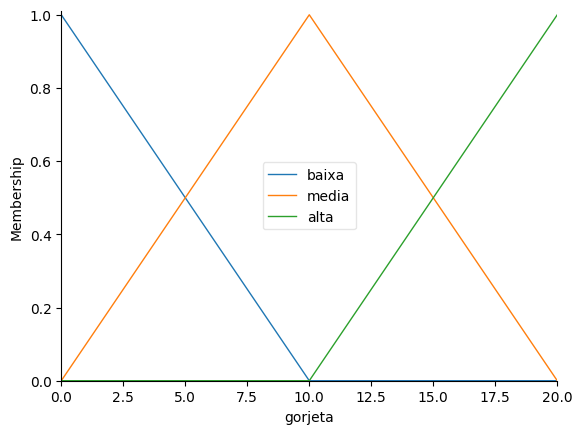

In [23]:
gorjeta.view()

In [24]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'],gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'],gorjeta['alta'])


**Sistema de controle**

Controle das regras

In [25]:
sistema_controle = ctrl.ControlSystem([regra1,regra2,regra3])

simulação do sistema

In [26]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

parametrizando a previsão

In [38]:
sistema.input['qualidade'] = 10
sistema.input['servico'] = 10
sistema.compute()

Saida da defuzzyficação

In [ ]:
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)

**Outras Funções**

grafico com a linha em S, muito utilizado redes neurais;
o primeiro paramentro passado,mostra aonde começa o decaimento do grafico
já o segundo se o valor for negaitvo começa da base superior, se for positivo
começa na inferior.

In [ ]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5,-1)
gorjeta.view()

Função gauseana

O primeiro parametro reflete no centro da distribuição
Ja o segundo reflete na largura da distribuição

In [ ]:
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta.view()

Função Pi

primeiro paramentro é aonde incia a linha do grafico, já o segundo
paramentro indica quando a pertinencia obtem o valor igual a 1,
o terceiro indica o ponto final, ja o quarto indica o declinio ate 0.

/usr/local/lib/python3.10/dist-packages/skfuzzy/membership/generatemf.py:240: RuntimeWarning: invalid value encountered in divide
  y[idx] = 2. * ((x[idx] - d) / (d - c)) ** 2.


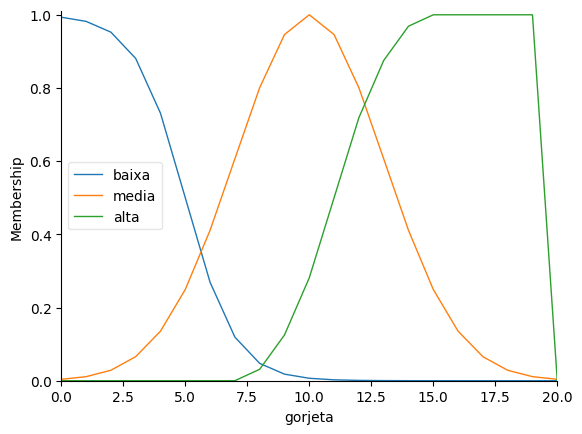

In [49]:
gorjeta['alta'] = fuzz.pimf(gorjeta.universe,7, 15, 20, 20)
gorjeta.view()